# Homework 1 — Linear Regression: Closed-form vs Gradient Descent
    
**Student:** Phani Pallavi Tallavajjhala 
**Student ID:** 700766070 
---

In [9]:
df = pd.read_csv("/Users/phanipallavi/Downloads/synthetic_data.csv")

Closed-form solution: intercept = 2.6908, slope = 4.1318
Gradient Descent solution: intercept = 2.6908, slope = 4.1318


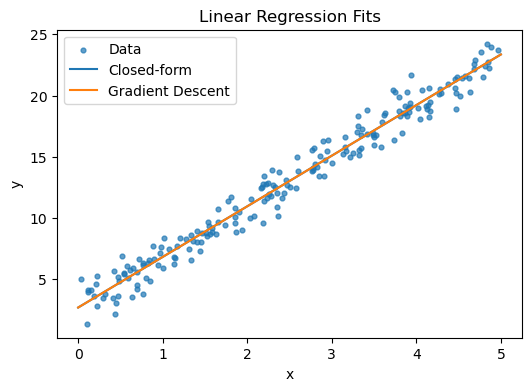

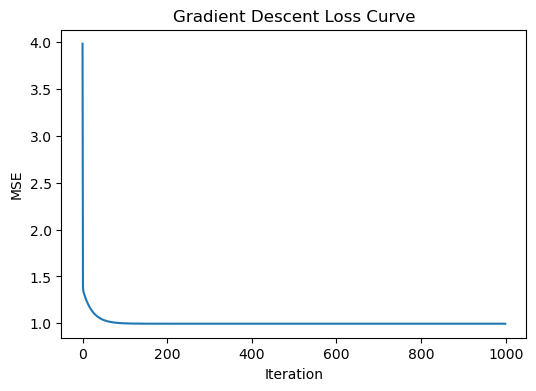

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Load the dataset from CSV ===
x = df["x"].values
y = df["y"].values

# Add bias column
X = np.column_stack([np.ones_like(x), x])

# === 2. Closed-form solution ===
theta_closed = np.linalg.solve(X.T @ X, X.T @ y)
print(f"Closed-form solution: intercept = {theta_closed[0]:.4f}, slope = {theta_closed[1]:.4f}")

# === 3. Gradient Descent ===
def grad(theta, X, y):
    m = X.shape[0]
    return (2.0/m) * (X.T @ (X @ theta - y))

def mse(theta, X, y):
    r = y - X @ theta
    return np.mean(r*r)

eta, iters = 0.05, 1000
theta_gd = np.zeros(2)
losses = []

for _ in range(iters):
    theta_gd -= eta * grad(theta_gd, X, y)
    losses.append(mse(theta_gd, X, y))

print(f"Gradient Descent solution: intercept = {theta_gd[0]:.4f}, slope = {theta_gd[1]:.4f}")

# === 4. Plots ===
xs = np.linspace(0, 5, 200)
Xplot = np.column_stack([np.ones_like(xs), xs])

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=12, alpha=0.7, label="Data")
plt.plot(xs, Xplot @ theta_closed, label="Closed-form")
plt.plot(xs, Xplot @ theta_gd, label="Gradient Descent")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Linear Regression Fits")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve")
plt.show()


## Explaination
    
**Results**
- Closed-form: parameters printed above.  
- Gradient Descent: parameters printed above.  

On this dataset, Gradient Descent converges to virtually the **same** parameters as the Closed-form solution. The loss curve shows rapid reduction early on followed by stabilization, indicating convergence. The two fitted lines overlap visually, confirming that both methods solve the same least-squares problem.
